<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_16_Quantum_Phase_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --quiet && pip install pylatexenc --quiet && pip install qiskit-aer

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import array_to_latex
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit.circuit.library import QFT

In [3]:
def get_state(circuit):
  state_vector_simulator = Aer.get_backend("statevector_simulator")
  job = execute(circuit, backend=state_vector_simulator)
  result = job.result()
  return result.get_statevector()

## Porta CNOT

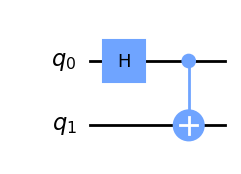

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

In [6]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

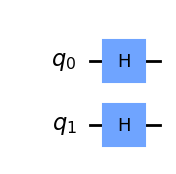

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.draw(output="mpl")

In [8]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

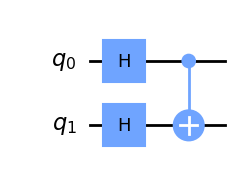

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.draw(output="mpl")

In [10]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

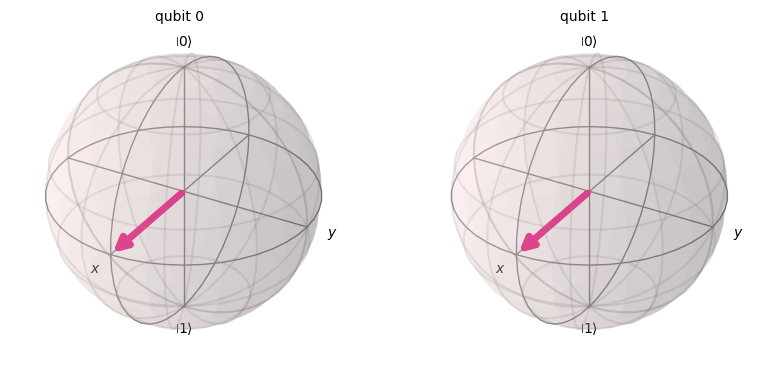

In [11]:
plot_bloch_multivector(get_state(qc))

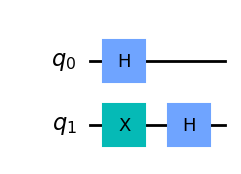

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw(output="mpl")

In [14]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

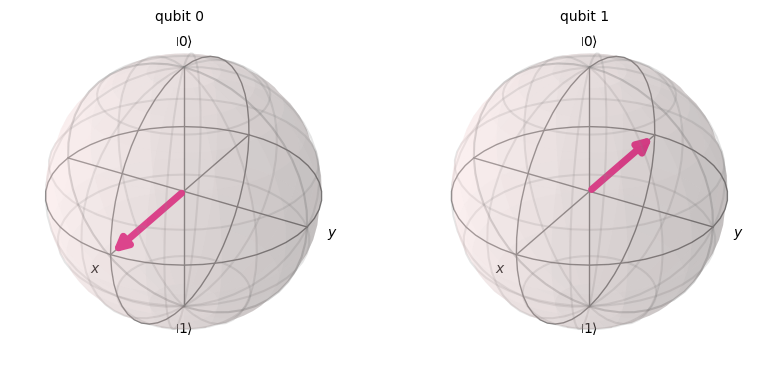

In [15]:
plot_bloch_multivector(get_state(qc))

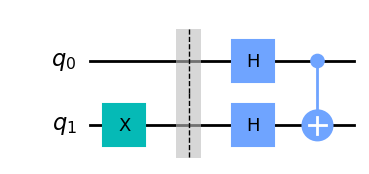

In [17]:
qc = QuantumCircuit(2)
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.draw(output="mpl")

In [18]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

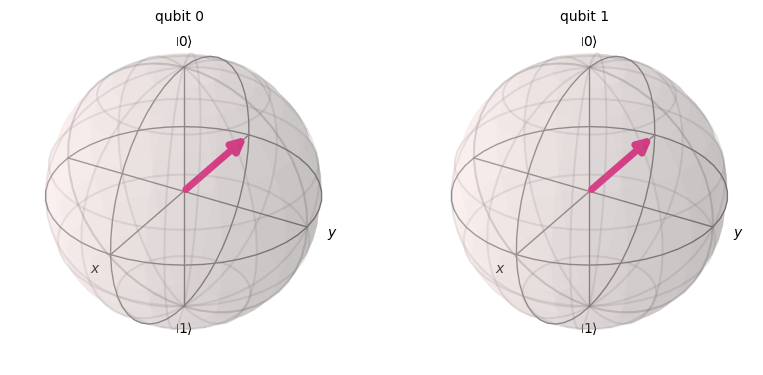

In [19]:
plot_bloch_multivector(get_state(qc))

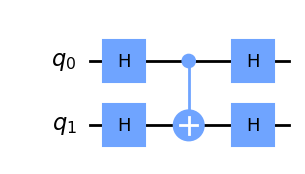

In [21]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.draw(output="mpl")

In [22]:
qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
unitary = usim.run(qc).result().get_unitary()
array_to_latex(unitary)

<IPython.core.display.Latex object>

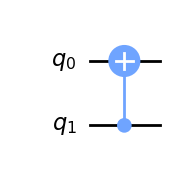

In [23]:
qc = QuantumCircuit(2)
qc.cx(1, 0)
qc.draw(output="mpl")

In [24]:
qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
unitary = usim.run(qc).result().get_unitary()
array_to_latex(unitary)

<IPython.core.display.Latex object>

## La porta CT (CP)

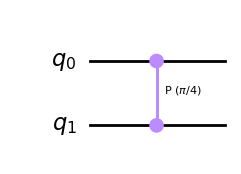

In [25]:
qc = QuantumCircuit(2)
qc.cp(np.pi/4, 0, 1)
qc.draw(output="mpl")

In [26]:
qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
unitary = usim.run(qc).result().get_unitary()
array_to_latex(unitary)

<IPython.core.display.Latex object>

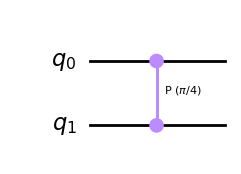

In [29]:
qc = QuantumCircuit(2)
qc.cp(np.pi/4, 0, 1)
qc.draw(output="mpl")

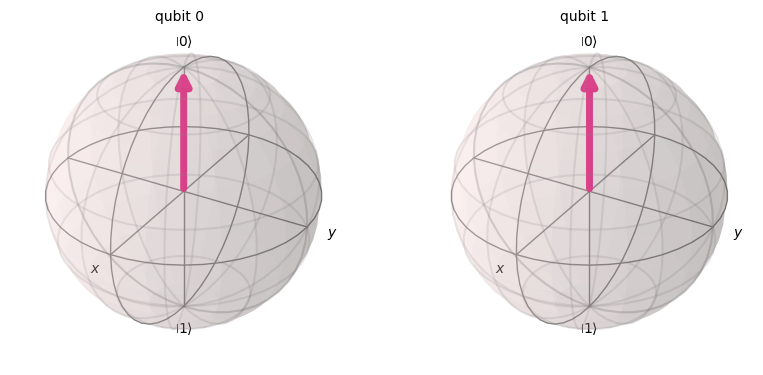

In [30]:
plot_bloch_multivector(get_state(qc))

In [28]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

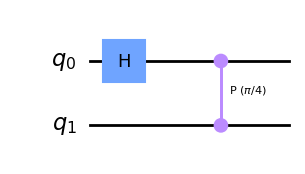

In [37]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cp(np.pi/4, 0, 1)
qc.draw(output="mpl")

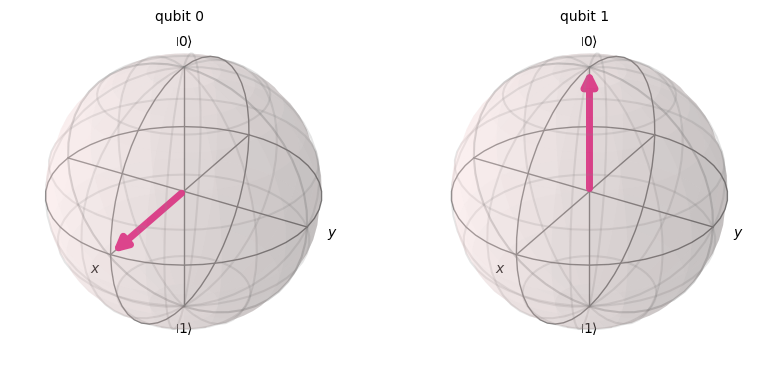

In [38]:
plot_bloch_multivector(get_state(qc))

In [39]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

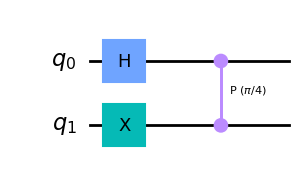

In [40]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(np.pi/4, 0, 1)
qc.draw(output="mpl")

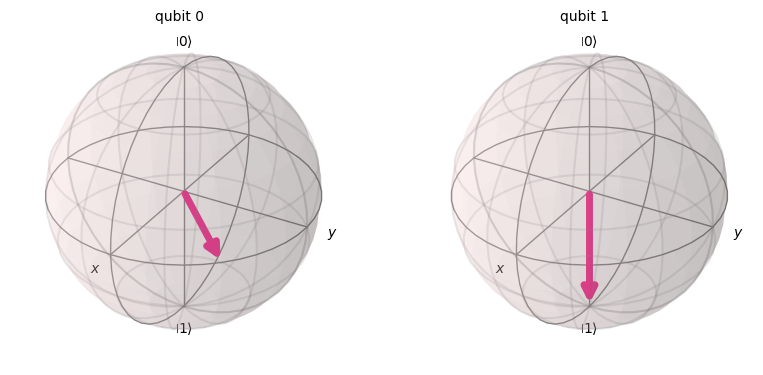

In [41]:
plot_bloch_multivector(get_state(qc))

## Quantum phase estimation prova con 1/8

In [42]:
out_q = QuantumRegister(3, "output")
phase_q = QuantumRegister(1, "phase")
out_b = ClassicalRegister(3, "measure")

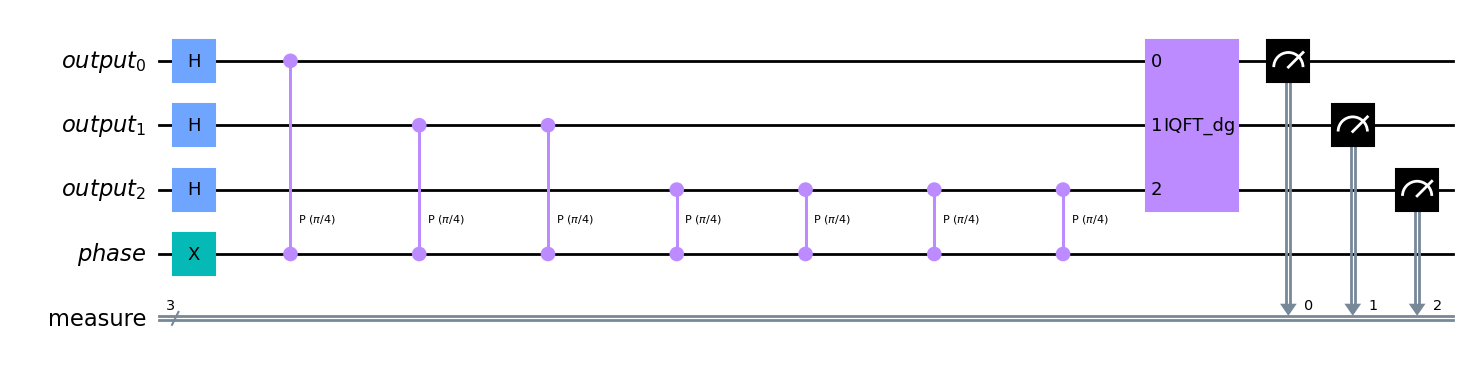

In [51]:
qc = QuantumCircuit(out_q, phase_q, out_b)

qc.h(range(3))

qc.x(3)

repetitions = 1
for counting_qubit in range(3):
  for i in range(repetitions):
    qc.cp(np.pi/4, counting_qubit, 3)
  repetitions *= 2

qc = qc.compose(QFT(3, inverse=True), [0, 1, 2])

qc.measure([0,1,2], [0,1,2])

qc.draw(output="mpl")

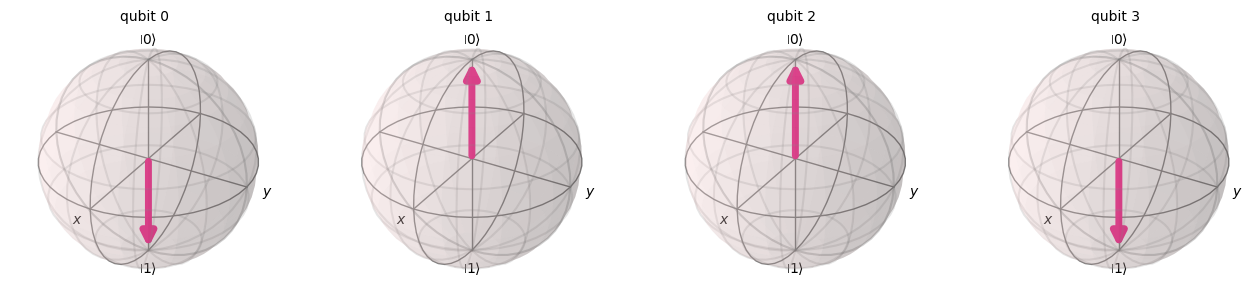

In [52]:
plot_bloch_multivector(get_state(qc))

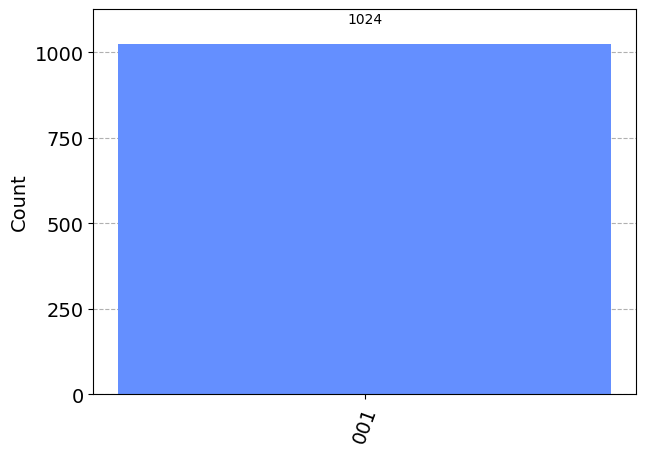

In [53]:
simulator = Aer.get_backend("qasm_simulator")
traspiled_qc = transpile(qc, simulator)
results = simulator.run(traspiled_qc).result()
plot_histogram(results.get_counts())

## Esempio con fase un terzo

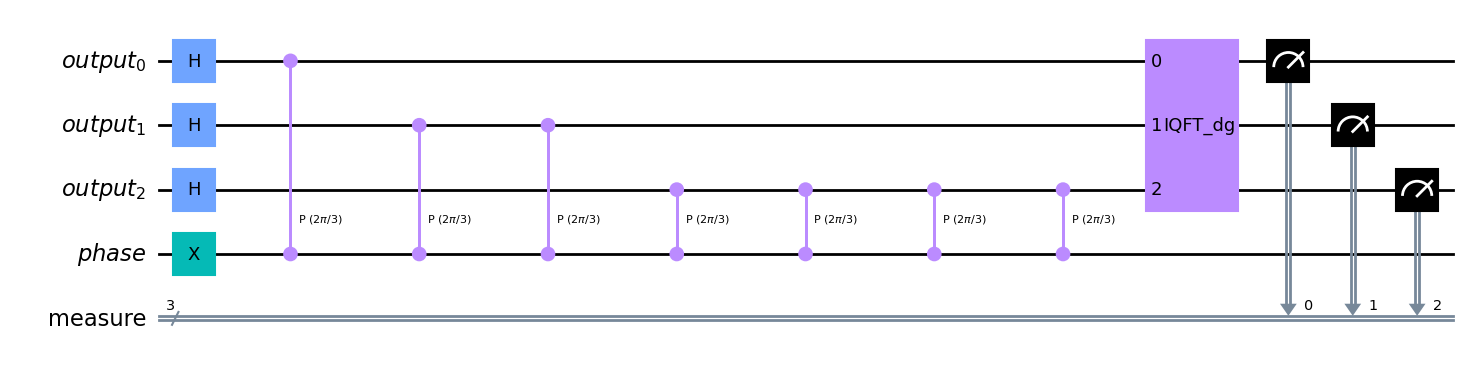

In [54]:
qc = QuantumCircuit(out_q, phase_q, out_b)

qc.h(range(3))

qc.x(3)

repetitions = 1
for counting_qubit in range(3):
  for i in range(repetitions):
    qc.cp(np.pi * 2 / 3, counting_qubit, 3)
  repetitions *= 2

qc = qc.compose(QFT(3, inverse=True), [0, 1, 2])

qc.measure([0,1,2], [0,1,2])

qc.draw(output="mpl")

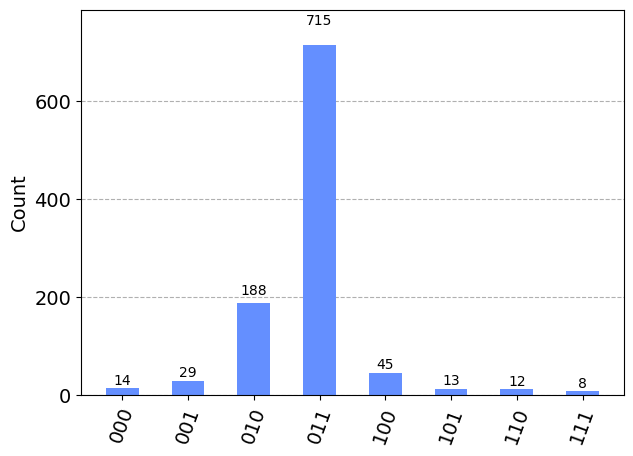

In [58]:
simulator = Aer.get_backend("qasm_simulator")
traspiled_qc = transpile(qc, simulator)
results = simulator.run(traspiled_qc).result()
plot_histogram(results.get_counts())

## Esempio con fase un terzo e 5 qubit di misurazione!

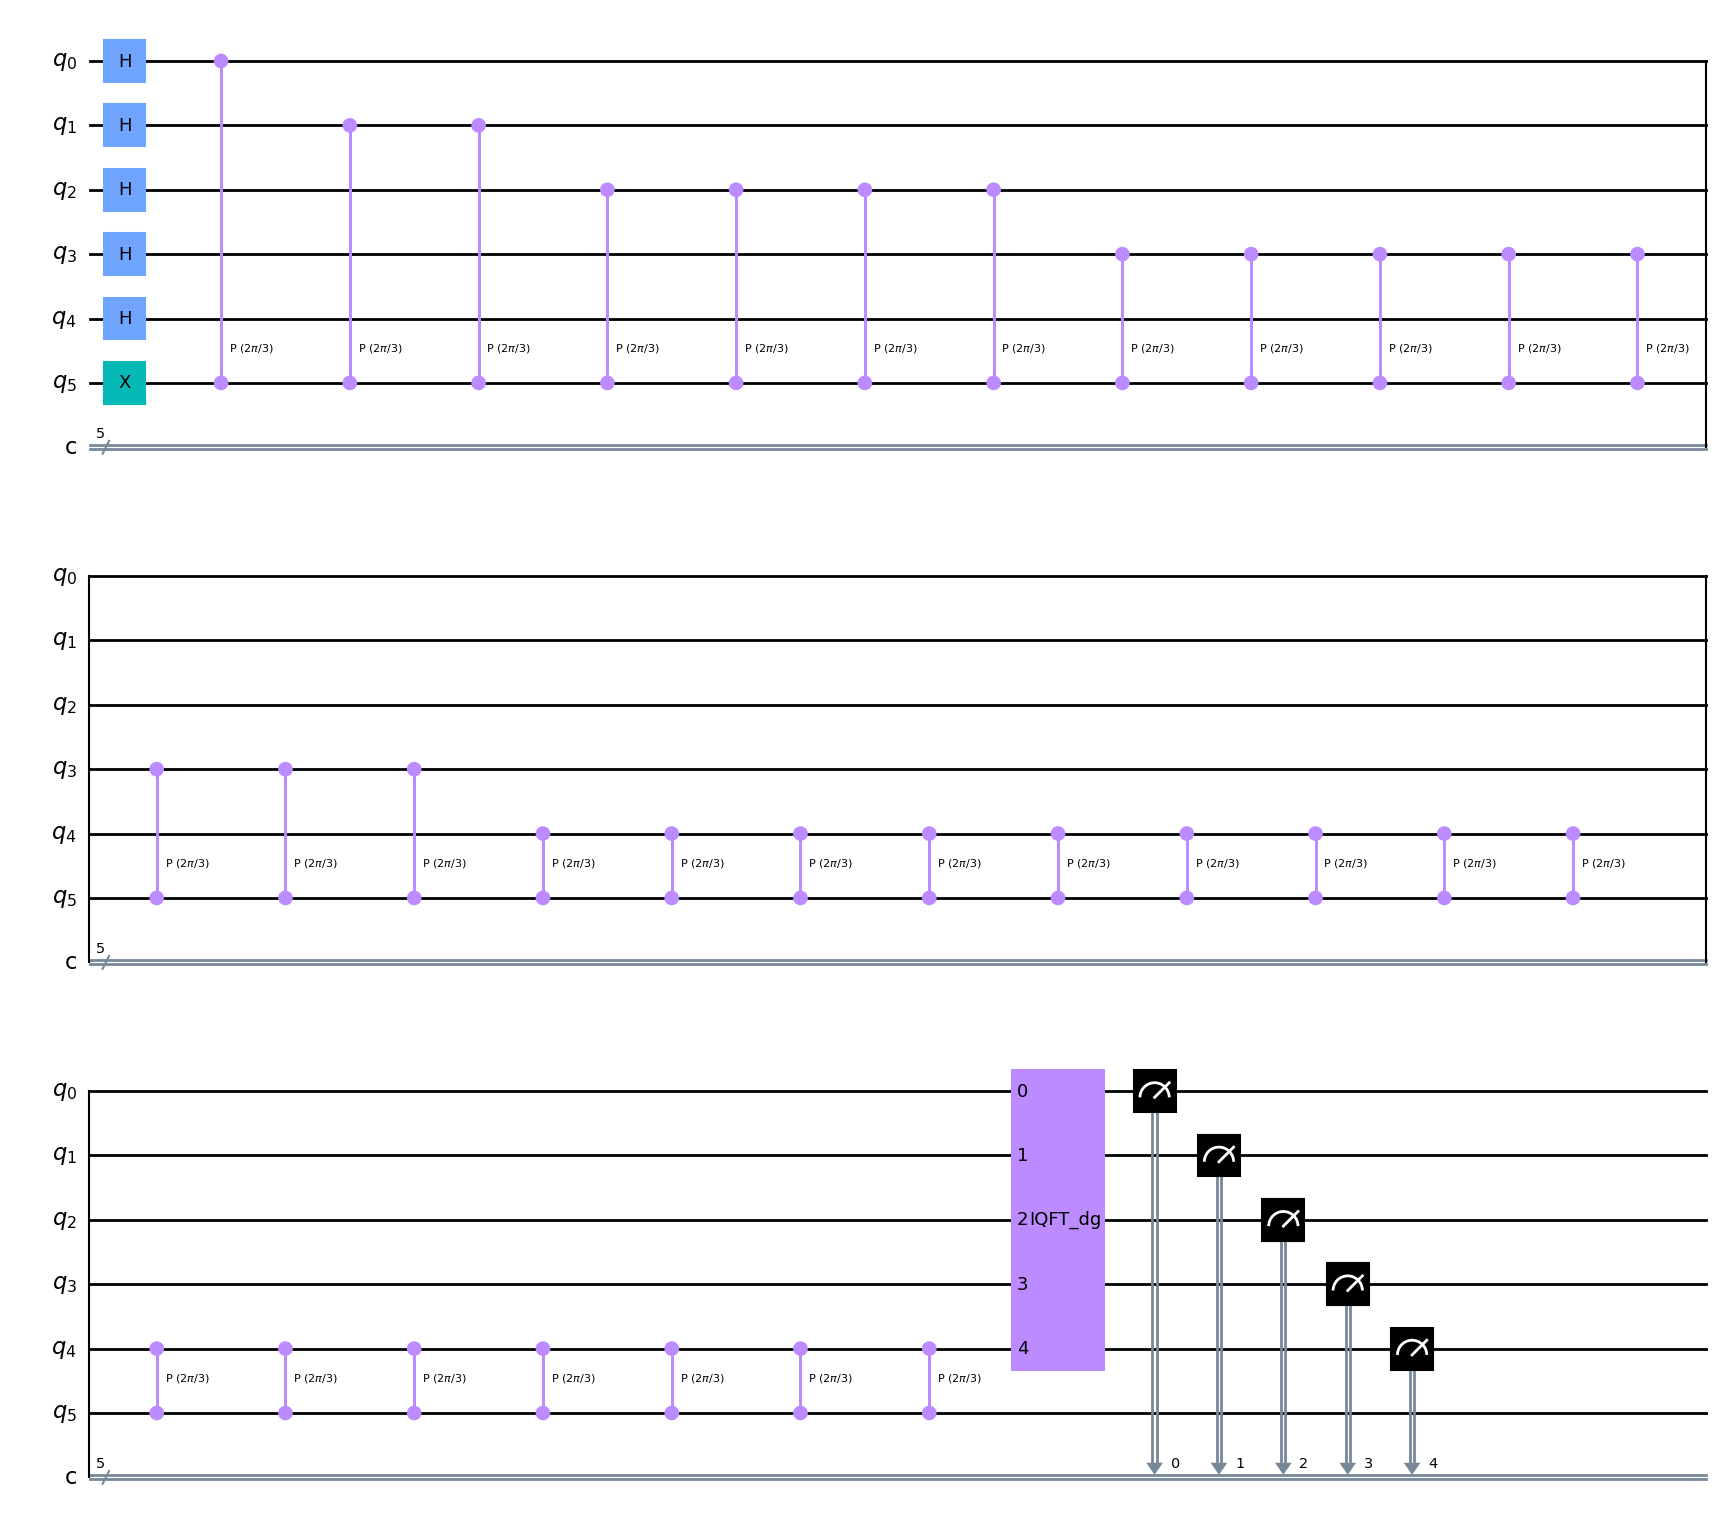

In [59]:
qc = QuantumCircuit(6, 5)

qc.h(range(5))

qc.x(5)

repetitions = 1
for counting_qubit in range(5):
  for i in range(repetitions):
    qc.cp(np.pi * 2 / 3, counting_qubit, 5)
  repetitions *= 2

qc = qc.compose(QFT(5, inverse=True), range(5))

qc.measure(range(5), range(5))

qc.draw(output="mpl")

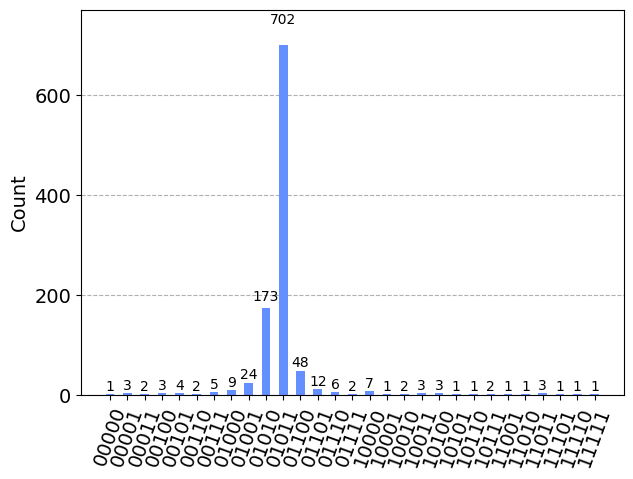

In [60]:
simulator = Aer.get_backend("qasm_simulator")
traspiled_qc = transpile(qc, simulator)
results = simulator.run(traspiled_qc).result()
plot_histogram(results.get_counts())